<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

In [1]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import statsmodels.api as sm

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [2]:
# import dataset
housing = pd.read_csv('./datasets/sacramento_real_estate_transactions.csv')

### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. Report any notable findings.

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [3]:
# display 5 rows
housing.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
# check shape
housing.shape

(985, 12)

In [5]:
# check type and missing values
housing.info()

# need to change column zip type from int to object
# and sale_date column to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [6]:
# change zip type to object
housing['zip'] = housing['zip'].astype('object')

# and sales date to date time
housing['sale_date'] = pd.to_datetime(housing['sale_date'])
housing.dtypes

C:\Users\Win10\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


street               object
city                 object
zip                  object
state                object
beds                  int64
baths                 int64
sq__ft                int64
type                 object
sale_date    datetime64[ns]
price                 int64
latitude            float64
longitude           float64
dtype: object

In [7]:
# summary statistics
housing.describe()

# Negative price in min need to remove

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [8]:
# filter housing price that greater than 0
housing = housing[housing['price'] > 0]

In [9]:
# check that filter work correctly
housing.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,2.913618,1.777439,1315.253049,234167.841463,38.607670,-121.355832
std,1.307175,0.895484,853.416702,138434.220875,0.145494,0.138268
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,951.500000,145000.000000,38.482714,-121.446121
50%,3.000000,2.000000,1304.000000,214375.000000,38.626257,-121.376010
75%,4.000000,2.000000,1718.500000,300000.000000,38.695611,-121.295557
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [10]:
# check unique value
housing.nunique()

street       980
city          39
zip           68
state          1
beds           8
baths          6
sq__ft       603
type           4
sale_date      5
price        604
latitude     968
longitude    966
dtype: int64

In [11]:
housing['city'].unique()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'EL DORADO HILLS', 'RANCHO MURIETA', 'WILTON',
       'GREENWOOD', 'FAIR OAKS', 'CAMERON PARK', 'LINCOLN', 'PLACERVILLE',
       'MEADOW VISTA', 'ROSEVILLE', 'ROCKLIN', 'AUBURN', 'LOOMIS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'FORESTHILL',
       'DIAMOND SPRINGS', 'SHINGLE SPRINGS', 'COOL', 'WALNUT GROVE',
       'GARDEN VALLEY', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

In [12]:
# group by state and count
housing.groupby(['state'])['price'].count()

state
CA    984
Name: price, dtype: int64

In [13]:
housing['beds'].unique()

array([2, 3, 1, 4, 0, 5, 8, 6], dtype=int64)

In [14]:
housing['baths'].unique()

array([1, 2, 3, 4, 0, 5], dtype=int64)

In [15]:
# group by type and count
housing.groupby(['type'])['price'].count()

# Find Unkown has 1 row 

type
Condo            53
Multi-Family     13
Residential     917
Unkown            1
Name: price, dtype: int64

In [16]:
# drop type Unlown because it has only one row
housing = housing[housing['type'] != 'Unkown']

In [17]:
# check filter unkown work correctly
housing.groupby(['type'])[['beds', 'baths', 'price']].agg(['count'])

,beds,baths,price
,count,count,count
type,,,
Condo,53,53,53
Multi-Family,13,13,13
Residential,917,917,917


When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [18]:
# export clean dataset
housing = housing.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

In [19]:
# import clean dataset
housing = pd.read_csv('./datasets/sacramento_cleaned_dataframe.csv')

Data with no outlier

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

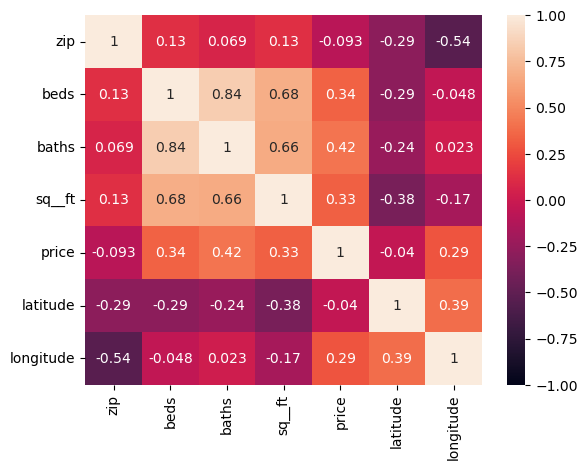

In [20]:
# check correlation
sns.heatmap(housing.corr(), annot=True,
           vmin=-1, vmax=1);

# there have no multicollinearity

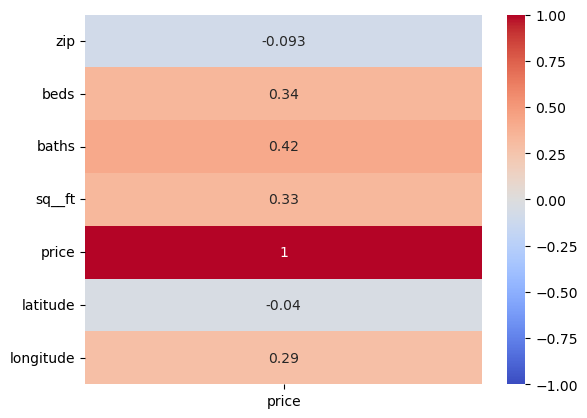

In [21]:
# check only price correlation
sns.heatmap(housing.corr()[['price']], annot=True,
           vmin=-1, vmax=1, cmap='coolwarm');

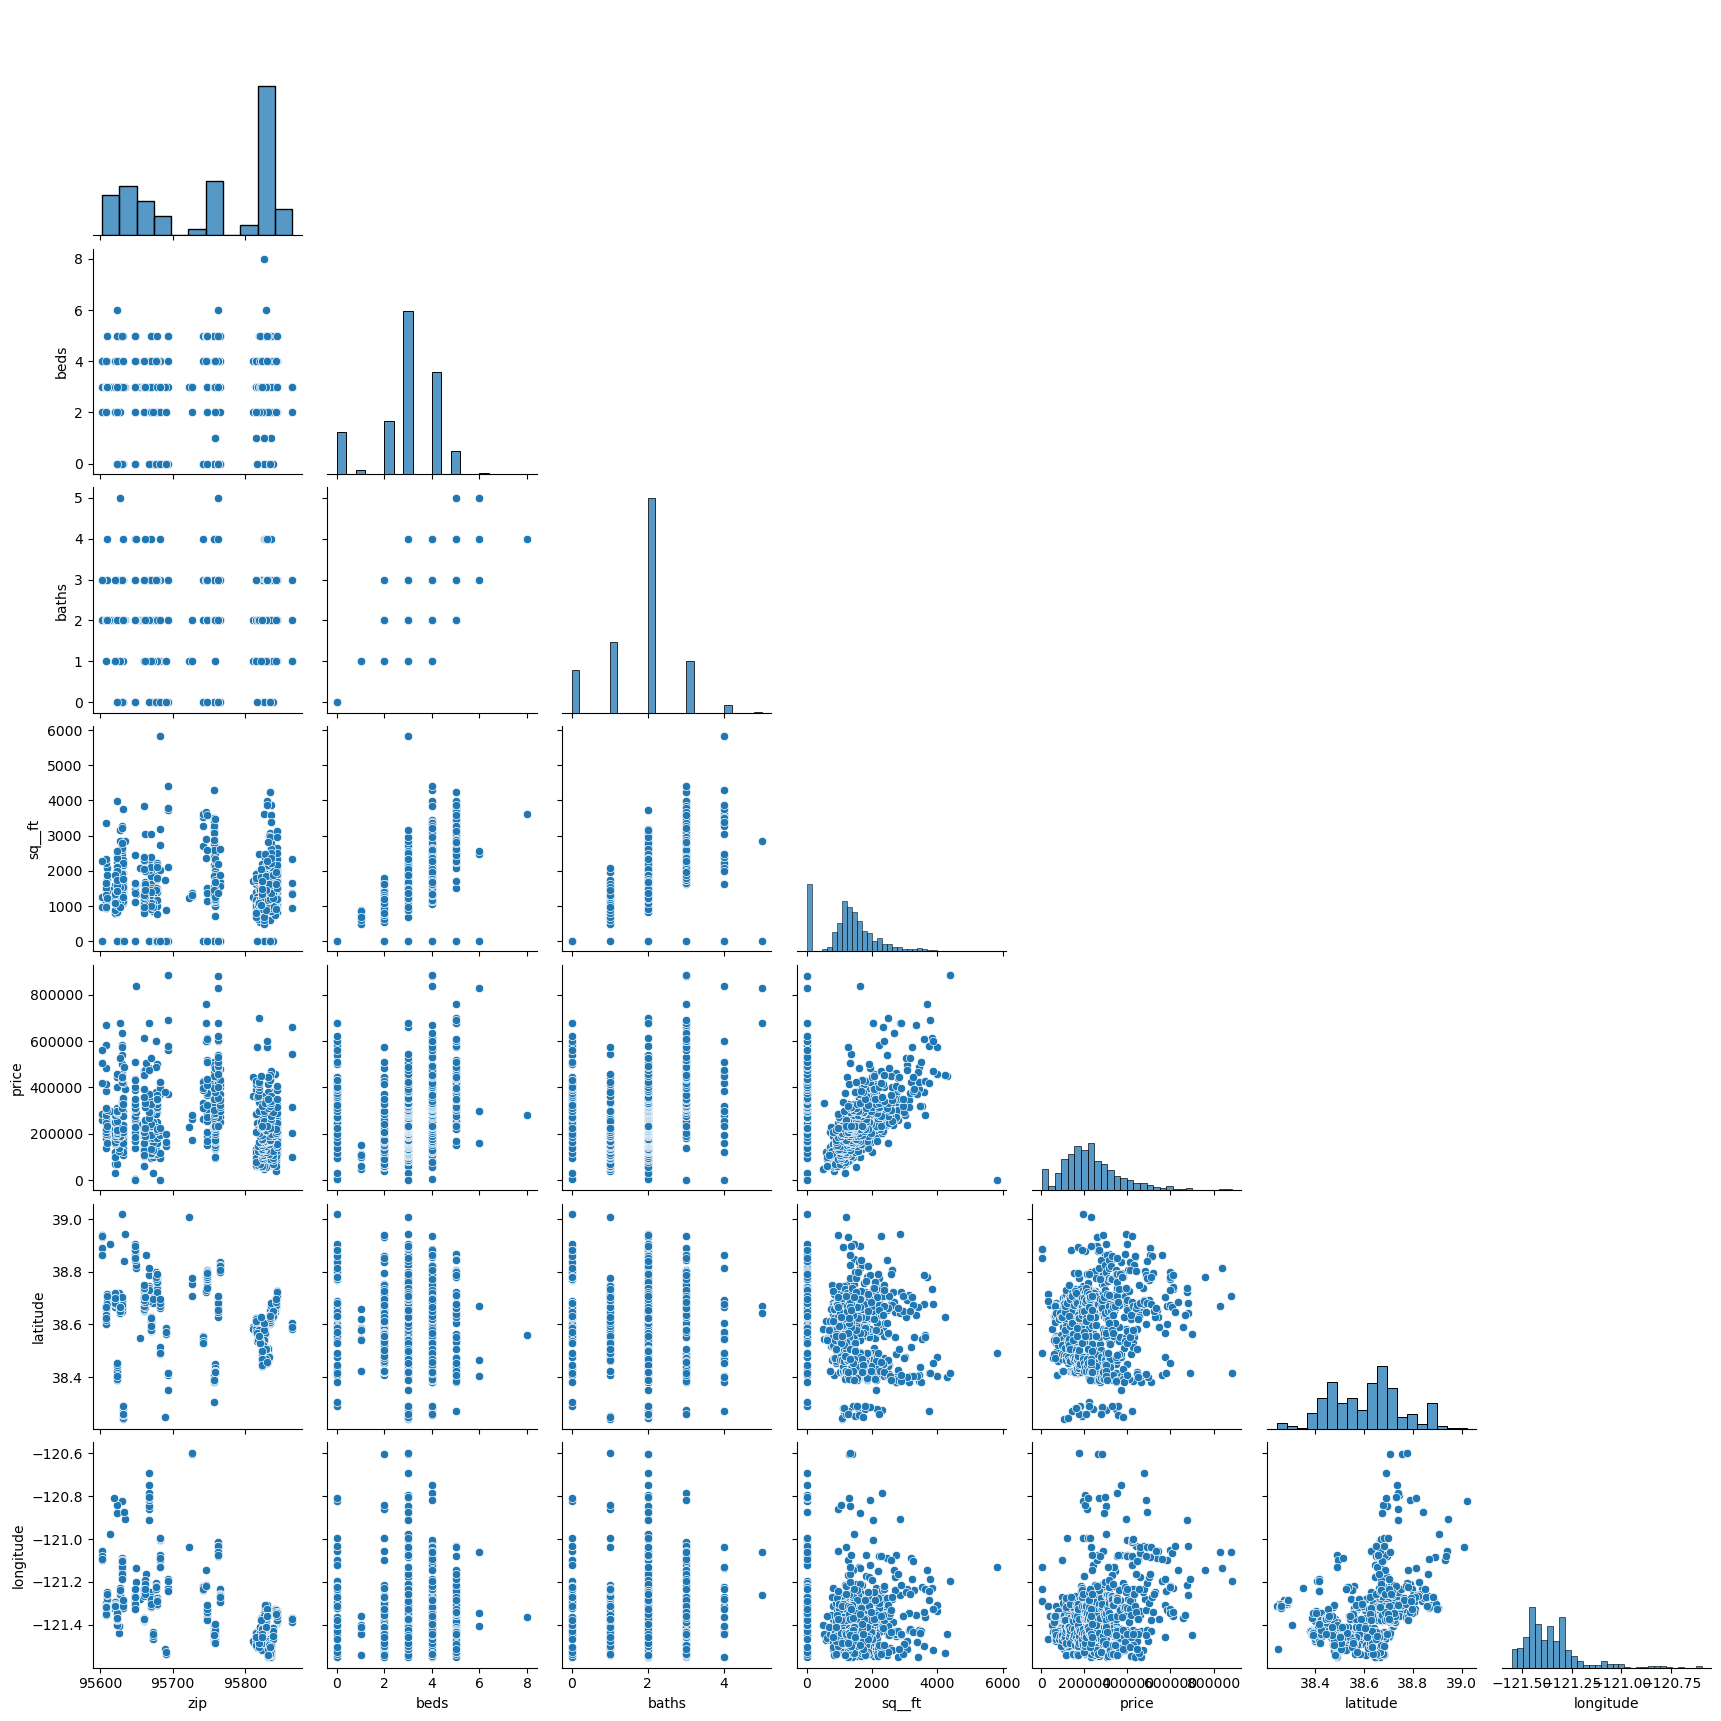

In [22]:
sns.pairplot(housing, corner = True)

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

**sq__ft** because from scatter plot that shown above show has almost clear line pattern than other chart.

### 5. Write a function that will take in two lists, `x` and `y`, and return the intercept and slope coefficients that minimize SSE. 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [23]:
def coefficient(X, y):
    # return slope and intercept
    slope = np.corrcoef(X, y)[0][1] * np.std(y)/np.std(X)
    intercept = np.mean(y) - slope*np.mean(X)
    
    return slope, intercept

In [24]:
print('slope and intercept =', coefficient(housing['sq__ft'], housing['price']))

slope and intercept = (54.3627746917255, 162552.7606602204)


### 6. Interpret the intercept and the slope.

from question number 5 **Intercept** is 161272.75 which mean start house price 161273 US dollars doesn't include other features.<br>
**Slope** of sq__ft is 55.17 which mean 1 square foot increase 55 US dollars.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

**Prediction** <br>
This model can predict housing price in CA for ML engineer

**Inference** <br>
This model can find pattern about price of house in CA for statistician

### 8: Using the model you came up with in Problem 5, calculate and plot the residuals.

In [25]:
# calculate coefficient
slope, intercept = coefficient(housing['sq__ft'], housing['price'])

In [26]:
slope , intercept

(54.3627746917255, 162552.7606602204)

In [27]:
# calculate predict price
y_hat = intercept + slope * housing['sq__ft']

In [28]:
# calculate residuals
residuals = housing['price'] - y_hat

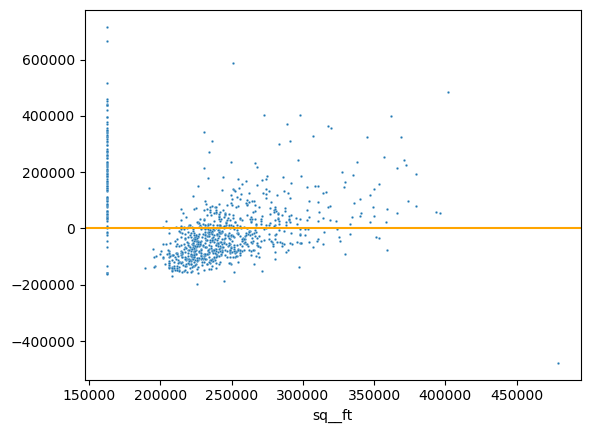

In [29]:
# plot residuals
sns.scatterplot(x=y_hat, y=residuals, s=3)
plt.axhline(0, color="orange");

# Not equal errors variance

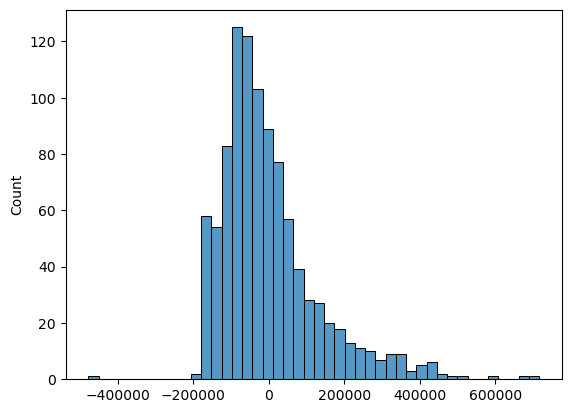

In [30]:
# plot residuals distribution
sns.histplot(residuals);

# It's not normal distribution

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [31]:
# create dummies variable
housing_dummy = pd.get_dummies(columns=['city','beds','baths','type'], drop_first=True, data=housing)

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [32]:
# check that dummies work correctly
housing_dummy.head()

,street,zip,state,sq__ft,sale_date,price,latitude,longitude,city_AUBURN,city_CAMERON PARK,...,beds_5,beds_6,beds_8,baths_1,baths_2,baths_3,baths_4,baths_5,type_Multi-Family,type_Residential
0,3526 HIGH ST,95838,CA,836,2008-05-21,59222,38.631913,-121.434879,0,0,...,0,0,0,1,0,0,0,0,0,1
1,51 OMAHA CT,95823,CA,1167,2008-05-21,68212,38.478902,-121.431028,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2796 BRANCH ST,95815,CA,796,2008-05-21,68880,38.618305,-121.443839,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2805 JANETTE WAY,95815,CA,852,2008-05-21,69307,38.616835,-121.439146,0,0,...,0,0,0,1,0,0,0,0,0,1
4,6001 MCMAHON DR,95824,CA,797,2008-05-21,81900,38.519470,-121.435768,0,0,...,0,0,0,1,0,0,0,0,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [33]:
# instantiate model
lr = LinearRegression()

In [34]:
# create feature
X = housing_dummy.drop(columns = ['street', 'zip','state', 'sale_date', 'latitude', 'longitude', 'price'])
X.columns

Index(['sq__ft', 'city_AUBURN', 'city_CAMERON PARK', 'city_CARMICHAEL',
       'city_CITRUS HEIGHTS', 'city_COOL', 'city_DIAMOND SPRINGS',
       'city_EL DORADO', 'city_EL DORADO HILLS', 'city_ELK GROVE',
       'city_ELVERTA', 'city_FAIR OAKS', 'city_FOLSOM', 'city_FORESTHILL',
       'city_GALT', 'city_GARDEN VALLEY', 'city_GOLD RIVER',
       'city_GRANITE BAY', 'city_GREENWOOD', 'city_LINCOLN', 'city_LOOMIS',
       'city_MATHER', 'city_MEADOW VISTA', 'city_NORTH HIGHLANDS',
       'city_ORANGEVALE', 'city_PENRYN', 'city_PLACERVILLE',
       'city_POLLOCK PINES', 'city_RANCHO CORDOVA', 'city_RANCHO MURIETA',
       'city_RIO LINDA', 'city_ROCKLIN', 'city_ROSEVILLE', 'city_SACRAMENTO',
       'city_SLOUGHHOUSE', 'city_WALNUT GROVE', 'city_WEST SACRAMENTO',
       'city_WILTON', 'beds_1', 'beds_2', 'beds_3', 'beds_4', 'beds_5',
       'beds_6', 'beds_8', 'baths_1', 'baths_2', 'baths_3', 'baths_4',
       'baths_5', 'type_Multi-Family', 'type_Residential'],
      dtype='object')

In [35]:
# create target
y = housing_dummy['price']

In [36]:
# train model
lr.fit(X, y)

LinearRegression()

In [37]:
# score model using R^2
lr.score(X, y)

0.5833225479769457

In [38]:
# test model
y_preds = lr.predict(X)

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

You can use matplotlib or seaborn.

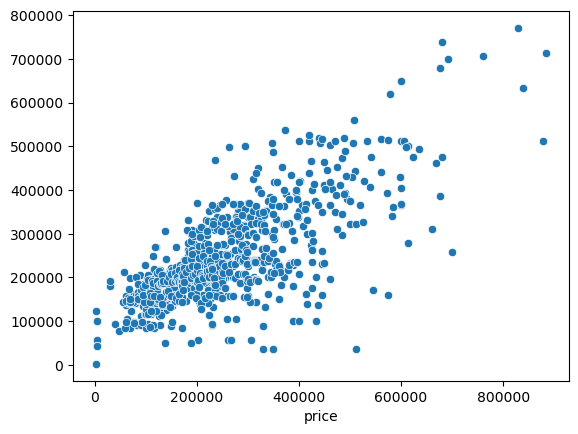

In [39]:
#plot y true and y predict
sns.scatterplot(x=y, y=y_preds);

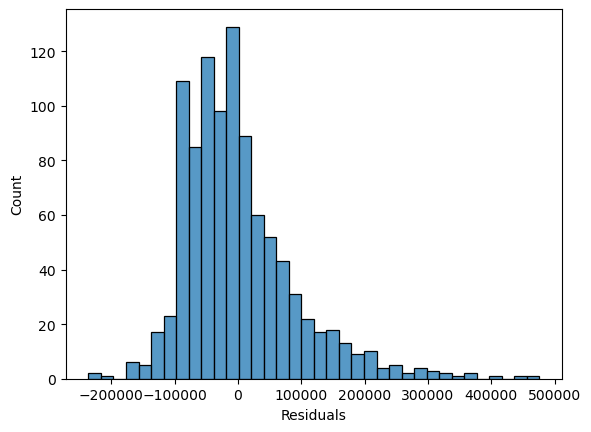

In [40]:
# plot residuals
sns.histplot(x=(y-y_preds))
plt.xlabel('Residuals');

# Not normality

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

1. Normality same as SLR
2. Equal errors variance same as SLR
3. Independence same as SLR
4. linearity same as SLR
5. Multicollinearity not same as SLR

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

**Independence** -> For observation had collected separately

**Multicollinearity** -> For each variable there are not have correlation greater than 0.8

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [41]:
X[['constant']] = 1
lr_sm = sm.OLS(y, X).fit()
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     25.56
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.88e-142
Time:                        15:36:34   Log-Likelihood:                -12601.
No. Observations:                 983   AIC:                         2.531e+04
Df Residuals:                     931   BIC:                         2.556e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sq__ft                  37.0075      6.146      6.021      0.000      24.945      49.070
city_AUBURN           2.021e+05   4.52e+04      4.471      0.000    1.13e+05    2.91e+05
city_CAMERON PARK     1.154e+05   3.53e+04      3.270      0.001    4.61e+04    1.85e+05
city_CARMICHAEL       9.768e+04   2.62e+04      3.735      0.000    4.64e+04    1.49e+05
city_CITRUS HEIGHTS  -9852.1176   2.25e+04     -0.438      0.661   -5.39e+04    3.42e+04
city_COOL             9.875e+04   9.33e+04      1.059      0.290   -8.43e+04    2.82e+05
city_DIAMOND SPRINGS   2.06e+04   9.33e+04      0.221      0.825   -1.62e+05    2.04e+05
city_EL DORADO        6.632e+04   6.71e+04      0.989      0.323   -6.53e+04    1.98e+05
city_EL DORADO HILLS   2.72e+05    2.7e+04     10.056      0.000    2.19e+05    3.25e+05
city_ELK GROVE        2.568e+04   1.83e+04      1.407      0.160   -1.01e+04    6.15e+04
city_ELVERTA         -6.352e+04   4.87e+04     -1.304      0.193   -1.59e+05    3.21e+04
city_FAIR OAKS        6.303e+04   3.57e+04      1.766      0.078   -6997.915    1.33e+05
city_FOLSOM           1.561e+05   2.75e+04      5.668      0.000    1.02e+05     2.1e+05
city_FORESTHILL      -9456.7715    9.4e+04     -0.101      0.920   -1.94e+05    1.75e+05
city_GALT              1.24e+04   2.58e+04      0.481      0.630   -3.82e+04     6.3e+04
city_GARDEN VALLEY    3.427e+05   9.37e+04      3.656      0.000    1.59e+05    5.27e+05
city_GOLD RIVER       1.473e+05   4.89e+04      3.012      0.003    5.13e+04    2.43e+05
city_GRANITE BAY      3.237e+05   5.61e+04      5.766      0.000    2.14e+05    4.34e+05
city_GREENWOOD        1.424e+05   9.36e+04      1.521      0.129   -4.14e+04    3.26e+05
city_LINCOLN         -1.035e+05   2.15e+04     -4.808      0.000   -1.46e+05   -6.13e+04
city_LOOMIS           2.924e+05   6.85e+04      4.267      0.000    1.58e+05    4.27e+05
city_MATHER           1.302e+04   9.33e+04      0.139      0.889    -1.7e+05    1.96e+05
city_MEADOW VISTA     6.189e+04   9.37e+04      0.661      0.509   -1.22e+05    2.46e+05
city_NORTH HIGHLANDS -4.491e+04    2.6e+04     -1.726      0.085    -9.6e+04    6155.980
city_ORANGEVALE       5.936e+04   3.22e+04      1.843      0.066   -3856.355    1.23e+05
city_PENRYN           3.105e+05   9.33e+04      3.329      0.001    1.27e+05    4.94e+05
city_PLACERVILLE      1.628e+05   3.35e+04      4.866      0.000    9.71e+04    2.28e+05
city_POLLOCK PINES    5.445e+04   5.55e+04      0.981      0.327   -5.44e+04    1.63e+05
city_RANCHO CORDOVA   3.111e+04   2.39e+04      1.302      0.193   -1.58e+04     7.8e+04
city_RANCHO MURIETA    2.35e+04   5.57e+04      0.422      0.673   -8.58e+04    1.33e+05
city_RIO LINDA       -1.317e+04   3.03e+04     -0.435      0.664   -7.26e+04    4.63e+04
city_ROCKLIN          1.642e+05   2.79e+04      5.895    

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [42]:
# create function calculate adjusted R^2
def r2_adj(y, y_preds, x_col):
    adj_r = 1 - (1-metrics.r2_score(y, y_preds)) * (len(y) - 1)/ \
                                                    (len(y) - len(x_col) - 1)
    return adj_r

In [43]:
# calculate R^2
r2_adj(y, y_preds, X.columns)

0.5595508526516262

### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [44]:
# R2:
metrics.r2_score(y, y_preds)

0.5833225479769457

In [45]:
# Adjusted R2:
r2_adj(y, y_preds, X.columns)

0.5595508526516262

In [46]:
# MAE:
metrics.mean_absolute_error(y, y_preds)

65617.20668586103

In [47]:
# RMSE:
metrics.mean_squared_error(y, y_preds, squared=False)

89356.10336194972

### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

### Second Tried
Add latitude and longitude variable

Add variables

In [48]:
# create dummies variable
housing_dummy_second = pd.get_dummies(columns=['city','beds','baths','type'], drop_first=True, data=housing)

In [49]:
# list feature and target
housing_dummy_second.columns

Index(['street', 'zip', 'state', 'sq__ft', 'sale_date', 'price', 'latitude',
       'longitude', 'city_AUBURN', 'city_CAMERON PARK', 'city_CARMICHAEL',
       'city_CITRUS HEIGHTS', 'city_COOL', 'city_DIAMOND SPRINGS',
       'city_EL DORADO', 'city_EL DORADO HILLS', 'city_ELK GROVE',
       'city_ELVERTA', 'city_FAIR OAKS', 'city_FOLSOM', 'city_FORESTHILL',
       'city_GALT', 'city_GARDEN VALLEY', 'city_GOLD RIVER',
       'city_GRANITE BAY', 'city_GREENWOOD', 'city_LINCOLN', 'city_LOOMIS',
       'city_MATHER', 'city_MEADOW VISTA', 'city_NORTH HIGHLANDS',
       'city_ORANGEVALE', 'city_PENRYN', 'city_PLACERVILLE',
       'city_POLLOCK PINES', 'city_RANCHO CORDOVA', 'city_RANCHO MURIETA',
       'city_RIO LINDA', 'city_ROCKLIN', 'city_ROSEVILLE', 'city_SACRAMENTO',
       'city_SLOUGHHOUSE', 'city_WALNUT GROVE', 'city_WEST SACRAMENTO',
       'city_WILTON', 'beds_1', 'beds_2', 'beds_3', 'beds_4', 'beds_5',
       'beds_6', 'beds_8', 'baths_1', 'baths_2', 'baths_3', 'baths_4',
      

In [50]:
# select feature
X = housing_dummy_second.drop(columns = ['street', 'zip','state', 'sale_date', 'price'])

In [51]:
# select target
y = housing_dummy_second['price']

In [52]:
# Create model
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [53]:
# test model and calculate residuals
y_preds = lr.predict(X)
residuals = y - y_preds

#### Score

In [54]:
# R2:
metrics.r2_score(y, y_preds)

0.5855363120343259

In [55]:
# MAE:
metrics.mean_absolute_error(y, y_preds)

65131.4490621831

In [56]:
# RMSE:
metrics.mean_squared_error(y, y_preds, squared=False)

89118.41738965389

### Third Tried
#### Clean Outliers using criteria 3 IQR

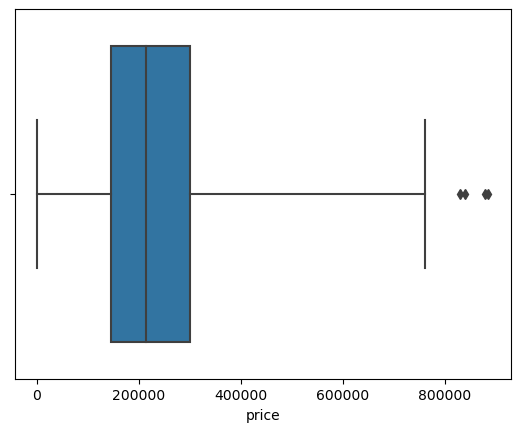

In [57]:
# plot boxplot for find outliers that lower or greater than 3 IQR
sns.boxplot(x='price', data=housing, whis=3.0);

In [58]:
# Calculate IQR
Q1 = np.quantile(housing['price'], 0.25)
Q3 = np.quantile(housing['price'], 0.75)
IQR = Q3 - Q1

In [59]:
# filter price lower and greater than 3 IQR
housing_not_outlier = housing[(housing['price'] > Q1 - 3*IQR) & (housing['price'] < Q3 + 3*IQR)]

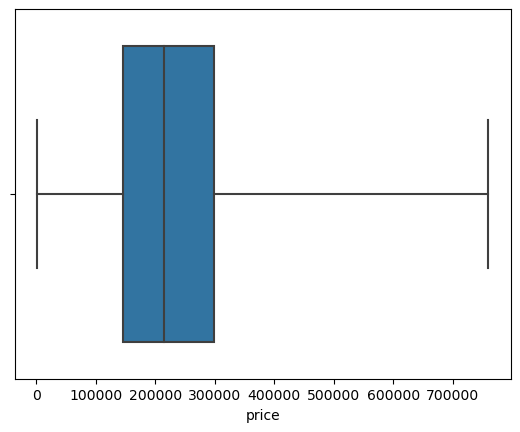

In [60]:
# plot boxplot for find outlier
sns.boxplot(x='price', data=housing_not_outlier, whis=3.0);

In [61]:
# Clean beds, baths, sq__ft that equal 0
housing_not_outlier = housing_not_outlier[(housing_not_outlier['beds'] != 0) & \
                   (housing_not_outlier['baths'] != 0) & \
                   (housing_not_outlier['sq__ft'] != 0)]

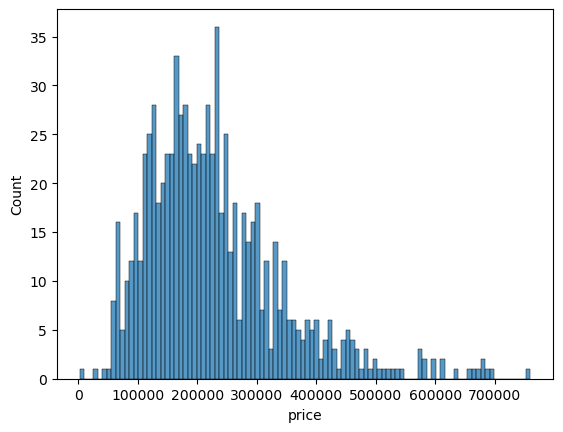

In [62]:
# It's not quite normal distribution
sns.histplot(x=housing_not_outlier['price'], bins=100);

#### Get dummies

In [63]:
# create dummies variable
housing_not_outlier_dummy = pd.get_dummies(columns = ['city','beds','baths','type'],\
                                           drop_first=True, data=housing_not_outlier)

#### Create Model

In [64]:
# select features
X = housing_not_outlier_dummy.drop(columns = ['street', 'zip','state', 'sale_date', 'latitude', 'longitude', 'price'])
X.columns

Index(['sq__ft', 'city_AUBURN', 'city_CAMERON PARK', 'city_CARMICHAEL',
       'city_CITRUS HEIGHTS', 'city_COOL', 'city_DIAMOND SPRINGS',
       'city_EL DORADO', 'city_EL DORADO HILLS', 'city_ELK GROVE',
       'city_ELVERTA', 'city_FAIR OAKS', 'city_FOLSOM', 'city_GALT',
       'city_GOLD RIVER', 'city_GRANITE BAY', 'city_GREENWOOD', 'city_LINCOLN',
       'city_LOOMIS', 'city_MATHER', 'city_MEADOW VISTA',
       'city_NORTH HIGHLANDS', 'city_ORANGEVALE', 'city_PENRYN',
       'city_PLACERVILLE', 'city_POLLOCK PINES', 'city_RANCHO CORDOVA',
       'city_RANCHO MURIETA', 'city_RIO LINDA', 'city_ROCKLIN',
       'city_ROSEVILLE', 'city_SACRAMENTO', 'city_SLOUGHHOUSE',
       'city_WALNUT GROVE', 'city_WEST SACRAMENTO', 'city_WILTON', 'beds_2',
       'beds_3', 'beds_4', 'beds_5', 'beds_6', 'beds_8', 'baths_2', 'baths_3',
       'baths_4', 'baths_5', 'type_Multi-Family', 'type_Residential'],
      dtype='object')

In [65]:
# select target
y = housing_not_outlier_dummy['price']

In [66]:
# train model
new_lr = LinearRegression()
new_lr.fit(X, y)

LinearRegression()

In [67]:
# test model
y_preds = new_lr.predict(X)

In [68]:
# calculate errors
residuals = y - y_preds

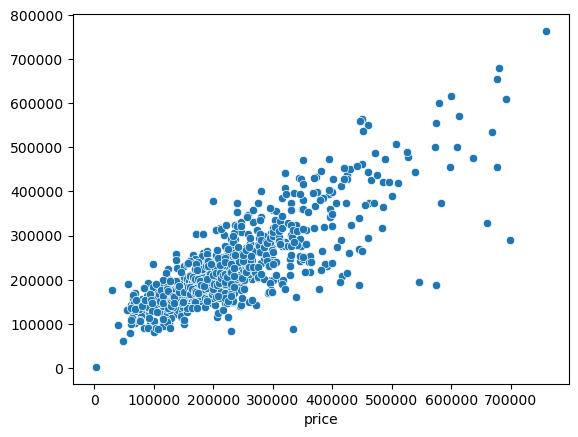

In [69]:
# plot y true and y predict
sns.scatterplot(x=y, y=y_preds);

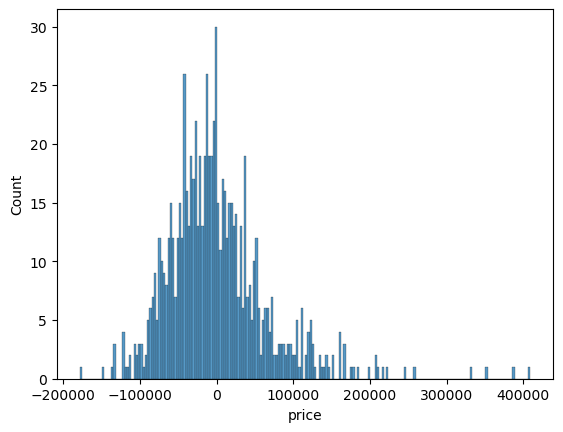

In [70]:
# plot errors distribution
sns.histplot(x=residuals,bins = 200);

In [71]:
# check skew
pd.Series(residuals).skew()

1.5070844673914074

#### Score model

In [72]:
# R2:
metrics.r2_score(y, y_preds)

0.6767445779962695

In [73]:
# MAE:
metrics.mean_absolute_error(y, y_preds)

47182.07050712091

In [74]:
# RMSE:
metrics.mean_squared_error(y, y_preds, squared=False)

65822.65614094112

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

Use Train test split for check my model

In [75]:
# train test split using data from third tried
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((648, 48), (163, 48))

In [76]:
# Instanciate model and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [77]:
# predict target
y_preds = lr.predict(X_test)

In [80]:
# R2:
metrics.r2_score(y_test, y_preds)

0.5237257276144154

In [78]:
# RMSE:
metrics.mean_squared_error(y_test, y_preds, squared=False)

79370.13938891784

My Linear Regression Model at this point, right now in **High Bias** Because score about model are not good.